In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import nltk
import os
from textblob import TextBlob
import time

os.chdir(r'C:\Users\sriva\OneDrive\Desktop\ISM6930_Text_Analytics\Project_Files')

In [2]:
streaming_platforms_data = pd.read_pickle('streaming_platforms_data.pkl')
streaming_platforms_data.shape

(348468, 8)

In [3]:
contractions = {
"ain’t": "am not",
"aren’t": "are not",
"can’t": "cannot",
"can’t’ve": "cannot have",
"‘cause": "because",
"could’ve": "could have",
"couldn’t": "could not",
"couldn’t’ve": "could not have",
"didn’t": "did not",
"doesn’t": "does not",
"don’t": "do not",
"hadn’t": "had not",
"hadn’t’ve": "had not have",
"hasn’t": "has not",
"haven’t": "have not",
"he’d": "he would",
"he’d’ve": "he would have",
"he’ll": "he shall / he will",
"he’ll’ve": " he will have",
"he’s": " he is",
"how’d": "how did",
"how’d’y": "how do you",
"how’ll": "how will",
"how’s": " how is",
"i’d": " I would",
"i’d’ve": "I would have",
"i’ll": " I will",
"i’ll’ve": " I will have",
"i’m": "I am",
"i’ve": "I have",
"isn’t": "is not",
"it’d": " it would",
"it’d’ve": "it would have",
"it’ll": "it will",
"it’ll’ve": "it will have",
"it’s": "it is",
"let’s": "let us",
"ma’am": "madam",
"mayn’t": "may not",
"might’ve": "might have",
"mightn’t": "might not",
"mightn’t’ve": "might not have",
"must’ve": "must have",
"mustn’t": "must not",
"mustn’t’ve": "must not have",
"needn’t": "need not",
"needn’t’ve": "need not have",
"o’clock": "of the clock",
"oughtn’t": "ought not",
"oughtn’t’ve": "ought not have",
"shan’t": "shall not",
"sha’n’t": "shall not",
"shan’t’ve": "shall not have",
"she’d": "she would",
"she’d’ve": "she would have",
"she’ll": "she will",
"she’ll’ve": "she will have",
"she’s": "she is",
"should’ve": "should have",
"shouldn’t": "should not",
"shouldn’t’ve": "should not have",
"so’ve": "so have",
"so’s": "so is",
"that’d": "that would",
"that’d’ve": "that would have",
"that’s": "that is",
"there’d": "there would",
"there’d’ve": "there would have",
"there’s": "there is",
"they’d": "they would",
"they’d’ve": "they would have",
"they’ll": "they will",
"they’ll’ve": "they will have",
"they’re": "they are",
"they’ve": "they have",
"to’ve": "to have",
"wasn’t": "was not",
"we’d": "we would",
"we’d’ve": "we would have",
"we’ll": "we will",
"we’ll’ve": "we will have",
"we’re": "we are",
"we’ve": "we have",
"weren’t": "were not",
"what’ll": "what will",
"what’ll’ve": "what will have",
"what’re": "what are",
"what’s": "what is",
"what’ve": "what have",
"when’s": "when is",
"when’ve": "when have",
"where’d": "where did",
"where’s": "where is",
"where’ve": "where have",
"who’ll": "who will",
"who’ll’ve": "who will have",
"who’s": "who is",
"who’ve": "who have",
"why’s": "why is",
"why’ve": "why have",
"will’ve": "will have",
"won’t": "will not",
"won’t’ve": "will not have",
"would’ve": "would have",
"wouldn’t": "would not",
"wouldn’t’ve": "would not have",
"y’all": "you all",
"y’all’d": "you all would",
"y’all’d’ve": "you all would have",
"y’all’re": "you all are",
"y’all’ve": "you all have",
"you’d": "you would",
"you’d’ve": "you would have",
"you’ll": "you will",
"you’ll’ve": "you will have",
"you’re": "you are",
"you’ve": "you have",
"rn": "right now"
}


In [4]:
def remove_contractions(text):
    for word in text.split():
        if word.lower() in contractions:
            text = text.replace(word, contractions[word.lower()])
    return text

In [5]:
streaming_platforms_data['text'] = streaming_platforms_data['text'].apply(lambda x : remove_contractions(x))
streaming_platforms_data['text'].head()

0    RT @Stargirl: Be free to be you 🌟@Stargirl is ...
1    RT @73redpt: You cannot see one without the ot...
2    RT @disneyplus: Maggie Simpson stars in a bran...
3    Dear @disneyplus: PLEASE. Revive #AgentCarter....
4    RT @Disney: It all starts on November 12. For ...
Name: text, dtype: object

In [6]:
import re
from nltk.tokenize import TweetTokenizer
tweet_tokenizer = TweetTokenizer()

tokenized_tweets = [tweet_tokenizer.tokenize(tweet) for tweet in streaming_platforms_data.text]
classifier_text = []
for tweet in tokenized_tweets:
    links = [w for w in tweet if re.search('^https:\w+', w)]
    words_in_tweet = [w.lower() for w in tweet if w.isalpha() or w.lower() in ('@primevideo', '@netflixhelps', '@netflix', '@hulu', '@disneyplus') and w not in links]
    classifier_text.append(' '.join(words_in_tweet))

print(len(classifier_text))
streaming_platforms_data['classifier_text'] = pd.Series(classifier_text)

348468


In [7]:
streaming_platforms_data.tail()

,index,screen_name,date_time,location,text,cleaned_tweet_text,is_retweet,sentiment,classifier_text
348463,457413,playtoys,2020-04-07 00:01:01,HS Teacher ;Where I wanna be!,"@cherifxdj @netflix @PrimeVideo Pretty much, a...",pretty much purchase movie good purchase money,False,Positive,@netflix @primevideo pretty much and purchase ...
348464,457414,YourFavStepmom,2020-04-07 00:01:00,NaN,"RT @PrimeVideo: Everyone, including Paul Rudd,...",everyone including paul rudd shocked learn tur...,True,Negative,rt @primevideo everyone including paul rudd is...
348465,457415,ZapruDerFlix,2020-04-07 00:00:58,Hollywood,What are some of the negative stigmas surround...,what negative stigma surrounding anxiety,True,Negative,what are some of the negative stigmas surround...
348466,457417,cherifxdj,2020-04-07 00:00:04,"Detroit, MI",@playtoys @netflix @PrimeVideo Wait what is 12...,wait month you watch prime movie,False,Neutral,@netflix @primevideo wait what is a month you ...
348467,457418,darkskyfilms,2020-04-07 00:00:00,"Orland Park, IL",One of the most acclaimed horror films of the ...,one acclaimed horror film decade stake land st...,True,Neutral,one of the most acclaimed horror films of the ...


In [8]:
tweet_list = streaming_platforms_data['classifier_text'].tolist()
#tweet_list = [tweet for tweet in tweet_list if str(tweet) != 'nan']

In [9]:
tweet_list

['rt be free to be you is now streaming on',
 'rt you cannot see one without the other @disneyplus',
 'rt @disneyplus maggie simpson stars in a animated short now streaming exclusively on just a month or',
 'dear @disneyplus please revive this show was fantastic and with how everything ends up with endgam',
 'rt it all starts on november for more info',
 '@disneyplus when are you going to put ride of skywalker on quarantine has me binge watching star wars everything a',
 '@disneyplus been streaming for long time',
 '@disneyplus bring it to @hulu i do not want a pg devil or we riot',
 'rt catch up on ahsoka s journey the final season of star wars is now streaming on',
 'rt episode of the final season of star wars is now streaming on',
 'rt follow ahsoka s path the eighth episode of the final season of star wars is now streaming on',
 'rt this is how @disneyplus is being promoted queen of disney channel is all over the ads everyone using her to b',
 'they need to make a frozen like omg t

In [10]:
list_of_streaming_platforms = []

# Iterated over a for loop to find out the streaming platform mentioned in the tweet
for i in streaming_platforms_data.index:
    screen_name = streaming_platforms_data.loc[i, 'screen_name']
    text = streaming_platforms_data.loc[i, 'text']
    tweet = text.lower()
    mentioned_platform = []
    
    if 'primevideo' in screen_name or 'primevideo' in tweet:
        mentioned_platform.append('primevideo')
    if 'netflix' in screen_name or 'netflix' in tweet:
        mentioned_platform.append('netflix')
    if 'hulu' in screen_name or 'hulu' in tweet:
        mentioned_platform.append('hulu')
    if 'disneyplus' in screen_name or 'disneyplus' in tweet:
        mentioned_platform.append('disneyplus')

    list_of_streaming_platforms.append(', '.join(mentioned_platform))
    
streaming_platforms_data['streaming_platform'] = pd.Series(list_of_streaming_platforms)
streaming_platforms_data = streaming_platforms_data[streaming_platforms_data['streaming_platform'] != ''].reset_index()

In [11]:
streaming_platforms_data = streaming_platforms_data.drop(['level_0'], axis=1)
streaming_platforms_data.tail()

,index,screen_name,date_time,location,text,cleaned_tweet_text,is_retweet,sentiment,classifier_text,streaming_platform
296825,457412,alishahoresh,2020-04-07 00:01:10,"New Jersey, USA",RT @PrimeVideo: “It’s important to draw open t...,important draw open curtain see light still sh...,True,Positive,rt @primevideo it s important to draw open the...,primevideo
296826,457413,playtoys,2020-04-07 00:01:01,HS Teacher ;Where I wanna be!,"@cherifxdj @netflix @PrimeVideo Pretty much, a...",pretty much purchase movie good purchase money,False,Positive,@netflix @primevideo pretty much and purchase ...,"primevideo, netflix"
296827,457414,YourFavStepmom,2020-04-07 00:01:00,NaN,"RT @PrimeVideo: Everyone, including Paul Rudd,...",everyone including paul rudd shocked learn tur...,True,Negative,rt @primevideo everyone including paul rudd is...,primevideo
296828,457415,ZapruDerFlix,2020-04-07 00:00:58,Hollywood,What are some of the negative stigmas surround...,what negative stigma surrounding anxiety,True,Negative,what are some of the negative stigmas surround...,primevideo
296829,457417,cherifxdj,2020-04-07 00:00:04,"Detroit, MI",@playtoys @netflix @PrimeVideo Wait what is 12...,wait month you watch prime movie,False,Neutral,@netflix @primevideo wait what is a month you ...,"primevideo, netflix"


In [12]:
grouped_streaming_data = streaming_platforms_data.groupby('streaming_platform')
grouped_streaming_data.groups.keys()

dict_keys(['disneyplus', 'hulu', 'hulu, disneyplus', 'netflix', 'netflix, disneyplus', 'netflix, hulu', 'netflix, hulu, disneyplus', 'primevideo', 'primevideo, disneyplus', 'primevideo, hulu', 'primevideo, hulu, disneyplus', 'primevideo, netflix', 'primevideo, netflix, disneyplus', 'primevideo, netflix, hulu', 'primevideo, netflix, hulu, disneyplus'])

In [13]:
list_of_connected_groups = []
for group in grouped_streaming_data.groups.keys():
    if len(group.split(',')) > 1:
        list_of_connected_groups.append(group)

In [14]:
print(list_of_connected_groups)

['hulu, disneyplus', 'netflix, disneyplus', 'netflix, hulu', 'netflix, hulu, disneyplus', 'primevideo, disneyplus', 'primevideo, hulu', 'primevideo, hulu, disneyplus', 'primevideo, netflix', 'primevideo, netflix, disneyplus', 'primevideo, netflix, hulu', 'primevideo, netflix, hulu, disneyplus']


In [15]:
target_streaming_data = streaming_platforms_data[streaming_platforms_data['streaming_platform'].isin(list_of_connected_groups)].reset_index()
target_streaming_data.shape

(27404, 11)

In [16]:
target_streaming_data = target_streaming_data.drop(['level_0', 'index'], axis = 1)
target_streaming_data.tail()
sample_target = target_streaming_data.sample(n = 8000, random_state = 95)
#sample_target.to_excel('sample_streaming_data.xlsx')

In [17]:
target_streaming_data.loc[target_streaming_data['sentiment'] == 'Negative', 'classifier_text'].values[-1]

'we desperately want @primevideo @hulu'

In [18]:
target_streaming_data.loc[target_streaming_data['sentiment'] == 'Negative', 'classifier_text'].values[-2]

'rt please put the hunger games trilogy on @hulu @netflix @primevideo idc trying to rewatch it during this quarantine'

In [19]:
target_streaming_data.loc[target_streaming_data['sentiment'] == 'Negative', 'classifier_text'].values[-3]

'@netflix @hulu @primevideo agreed sad the way some people seem to even live their live'

In [20]:
target_streaming_data.loc[target_streaming_data['sentiment'] == 'Negative', 'classifier_text'].values[-4]

'@hulu @primevideo ill be there hopefully my cinema club t comes in time for next week'

In [21]:
target_streaming_data.loc[target_streaming_data['sentiment'] == 'Negative', 'classifier_text'].values[-5]

'@hulu @primevideo oh my god this is in germany that is gonna be tough'

In [22]:
target_streaming_data.loc[target_streaming_data['sentiment'] == 'Negative', 'cleaned_tweet_text'].values[-6]

'too late italy work possible little sooner'

In [23]:
target_streaming_data.loc[target_streaming_data['sentiment'] == 'Negative', 'classifier_text'].values[-7]

'@hulu @primevideo oh shit like my time'

In [24]:
target_streaming_data.loc[target_streaming_data['sentiment'] == 'Negative', 'classifier_text'].values[-8]

'@hulu @primevideo wondering if there is a slight chance that u can change t'

In [25]:
target_streaming_data.loc[target_streaming_data['sentiment'] == 'Negative', 'classifier_text'].values[-9]

'@hulu @primevideo damn i wish it would not be so late for me here it should be am'

In [26]:
target_streaming_data.loc[target_streaming_data['sentiment'] == 'Negative', 'classifier_text'].values[-10]

'@hulu @primevideo why do you all pick these scary movies'

In [27]:
target_streaming_data.loc[target_streaming_data['sentiment'] == 'Negative', 'classifier_text'].values[-11]

'@primevideo really has terrible selection compared to @netflix'

In [28]:
target_streaming_data.loc[target_streaming_data['sentiment'] == 'Negative', 'classifier_text'].values[-12]

'@primevideo a highlander reboot is something i can get behind if they do it right or a hbo netflix series'

In [29]:
target_streaming_data.loc[target_streaming_data['sentiment'] == 'Negative', 'classifier_text'].values[-13]

'@netflix @primevideo step up ur game'

In [30]:
target_streaming_data.loc[target_streaming_data['sentiment'] == 'Negative', 'classifier_text'].values[-14]

'@hulu @primevideo i watched lake placid today not exactly an oscar winner b'

In [31]:
target_streaming_data.loc[target_streaming_data['sentiment'] == 'Negative', 'classifier_text'].values[-15]

'rt a sequel spinoff would ease the pain of our grief @netflix @primevideo'

In [32]:
target_streaming_data.loc[target_streaming_data['sentiment'] == 'Negative', 'classifier_text'].values[-16]

'@hulu @primevideo this is stupid'

In [33]:
target_streaming_data.loc[target_streaming_data['sentiment'] == 'Positive', 'classifier_text'].values[-1]

'@netflix @primevideo pretty much and purchase movies for good so once i purchase them money i'

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import LatentDirichletAllocation as LDA
from nltk.tokenize import sent_tokenize

In [35]:
train_tweet = target_streaming_data.loc[target_streaming_data['sentiment'] == 'Negative', 'classifier_text'].values[-3]
train_tweet = ' '.join([w for w in train_tweet.split() if w not in ('@primevideo', '@disneyplus')])
train_tweet

'@netflix @hulu agreed sad the way some people seem to even live their live'

In [36]:
test_tweet = target_streaming_data.loc[target_streaming_data['sentiment'] == 'Negative', 'classifier_text'].values[-15]
test_tweet = ' '.join([w for w in test_tweet.split() if w not in ('@primevideo', '@disneyplus')])
test_tweet

'rt a sequel spinoff would ease the pain of our grief @netflix'

In [37]:
from sklearn.feature_extraction.text import CountVectorizer 

In [38]:
cleaned_text = ' '.join([w for w in train_tweet.split() if w not in ('@primevideo', '@netflix', '@hulu', '@disneyplus')])
blob = TextBlob(cleaned_text)
blob.tags

[('agreed', 'VBN'),
 ('sad', 'PDT'),
 ('the', 'DT'),
 ('way', 'NN'),
 ('some', 'DT'),
 ('people', 'NNS'),
 ('seem', 'VBP'),
 ('to', 'TO'),
 ('even', 'RB'),
 ('live', 'VB'),
 ('their', 'PRP$'),
 ('live', 'JJ')]

In [39]:
target_streaming_data.loc[target_streaming_data['sentiment'] == 'Positive', 'text'].values[-1]

"@cherifxdj @netflix @PrimeVideo Pretty much, and purchase movies for good. So once I purchase them, they're money i… https://t.co/S0DxWnMeDu"

In [40]:
#indicators: ['buffering', 'quality', 'content', 'show', 'subtitle', 'payment', 'subscription', 'login', 'comparison', 'better', 'season']

In [41]:
list_of_tweets = target_streaming_data['classifier_text'].tolist()
for tweet in list_of_tweets:
    if 'from' in tweet and 'to' in tweet:
        print(tweet)

recommend some netflix or hulu series to watch please taking a break from documentaries
rt please add @hulu @netflix to tweets do not forget the hashtags please message from
i can confidently say that i have gone from watching a bit of tv a week to being subscribed to hulu netflix disney
without net neutrality rules major isps will be able to block video services like hulu and netflix from competing with cable networks
recommend some netflix or hulu series to watch please taking a break from documentaries
@disneyplus terrible customer service and unable to cancel my subscription learn from @netflix not going to buy t
it would be nice if my face would stop breaking out from stress
going from watching hulu in one room to netflix in another so that i can get asked if i am still there and have the answer be no
it is a medical sitcom from early that used to be on netflix and hulu so a lot of people watched in like
binge watching movies i had to switch from netflix to hulu tho
from to what y

In [42]:
vectorizer = CountVectorizer(ngram_range=(2, 3))
analyzer = vectorizer.build_analyzer()

for tweet in tweet_list:
    ngrams = analyzer(tweet)
    count = 0
    for i in ngrams:
        if 'from' in i.split() and 'to' in i.split():
            print(tweet)

rt loving @disneyplus but even then i cannot escape from great to see drain the oceans by on there with
rt loving @disneyplus but even then i cannot escape from great to see drain the oceans by on there with
loving @disneyplus but even then i cannot escape from great to see drain the oceans by on ther
rt see timon and pumbaa go from sketch to final in this the lion king is now streaming on ht
needs to be on more platforms hell i had to switch from sling to hulu live just to get fox
needs to be on more platforms hell i had to switch from sling to hulu live just to get fox
just discovered that there is a hulu app on so if you need me i will be over here watching from start to finish
give me suggestions for films to watch from the s and s a plus if they can streamed on netflix p
from to here are the best hulu original series to watch right now
from to here are the best hulu original series to watch right now
rt @netflix tigertail spanning continents and decades from taiwan to new york cit

In [43]:
clf_tweet_list = target_streaming_data['classifier_text'].tolist()
for tweet in clf_tweet_list:
    if 'comparison' in tweet or 'better' in tweet or 'disappointed' in tweet:
        print(tweet)

@disneyplus netflix is better bruh
rt hulu is better than netflix
@netflix @hulu you know i think is better for judy role for julia pend
can you all recommend any spooky or funny movies on netflix or hulu or anywhere free pls it would be better if the
rt hulu is better than netflix
nothing better when home alone for the day than cooking binging on netflix hulu
so i am a little late but i just saw @netflix cancelled daybreak how could you @hulu is better anyways
thank you for clearing it up by the way hulu is better than netflix
hulu is a better than netflix
it is better it allows you to etch hulu disney netflix youtube and everything else on your tv an
hulu is better than netflix
community on @hulu is better than @netflix i know why but netflix cut a lot of stuff out of episodes hulu has not
i am just gonna say it hulu is better than netflix
i am just gonna say hulu is better than netflix
ppl out here saying hulu better than netflix mi nuh seet
i cannot believe hulu has better shows th

In [44]:
def getChurnLikeliness(text):
    churn_indicators = ['recommendations', 'finished', 'commercials', 'ads', 'interrupted', 'interruption', 'buffering', 'buffer', 'quality', 'content', 'subtitles', 'subtitle', 'payment', 'subscription', 'subscribers', 'login', 'comparison', 'never use', 'better']
    #churn_indicators = [word_lemmatizer.lemmatize(w) for w in churn_indicators]
    churn_reasons = []
    sentences = TextBlob(text).sentences
    for s in sentences:
        for i in churn_indicators:
            if s not in churn_reasons and i in s.lower():
                churn_reasons.append(s.string)
    if len(churn_reasons) > 0:
        churn_likeliness = 1
    else:
        churn_likeliness = 0
    return churn_likeliness

In [45]:
def getChurnPlatform(text):
    platforms = []
    if re.search(r'\b[p][r][i][m][e][v][i][d][e][o]\S* | \b[@][p][r][i][m][e][v][i][d][e][o]\S* | \b[p][r][i][m][e]\s[v][i][d][e][o]\S*', text):
        platforms.append('primevideo')
    if re.search(r'\b[n][e][t][f][l][i][x]\S* | \b[@][n][e][t][f][l][i][x]\S*', text):
        platforms.append('netflix')
    if re.search(r'\b[h][u][l][u]\S* | \b[@][h][u][l][u]\S*', text):
        platforms.append('hulu')
    if re.search(r'\b[d][i][s][n][e][y][p][l][u][s]\S* | \b[@][d][i][s][n][e][y][p][l][u][s]\S* | \b[d][i][s][n][e]\s[y][p][l][u][s]\S*', text):
        platforms.append('disneyplus')
    return platforms

In [46]:
sample_target['churn_likelines'] = sample_target['classifier_text'].apply(lambda x : getChurnLikeliness(x))

In [47]:
sample_target.churn_likelines.value_counts

<bound method IndexOpsMixin.value_counts of 19159    0
20955    0
6979     0
6422     0
9704     0
        ..
2658     0
14346    0
10293    0
555      0
1306     0
Name: churn_likelines, Length: 8000, dtype: int64>

In [48]:
sample_target.to_excel('sample_target_data_with_churn.xlsx')

In [49]:
text = '@netflix prime video tough pill to swallow dylon'
getChurnPlatform(text)

['primevideo', 'netflix']

In [50]:
sample_target_test_data = streaming_platforms_data.sample(n=500, random_state=10)
sample_target_test_data.to_excel('sample_target_test_data.xlsx')

### Classification Models

In [51]:
target_columns = ['text', 'churn_likelines']
training_dataset = pd.DataFrame(sample_target, columns = target_columns)
training_dataset.head()
training_dataset.isna().sum()

text               0
churn_likelines    0
dtype: int64

In [52]:
test_dataset = pd.read_excel('sample_target_test_data_v1.xlsx')
test_dataset.head()

,index,screen_name,date_time,location,text,cleaned_tweet_text,twitter_handles,twitter_hashtags,is_retweet,polarity,subjectivity,sentiment,streaming_platform,classifier_text,churn_likelines
0,321867,MijiMijiyoon38,2020-03-28 08:38:20,NaN,@_SublimeHorror @folk_horror @PrimeVideo It ma...,may know found somewhere way folk horror reviva,"@_sublimehorror, @folk_horror, @primevideo",NaN,False,0.00,0.000000,Neutral,primevideo,@primevideo it may be on yt i know i found it ...,0
1,75736,SymaChowdhry,2020-03-28 12:56:17,"Detroit, MI",Need something recommendations to watch this s...,need something recommendation watch soggy week...,@wxyzdetroit,#disneyplus,True,0.10,0.383333,Positive,disneyplus,need something recommendations to watch this s...,0
2,118518,Mogulsociety,2020-04-03 02:24:30,"Brooklyn, NY",@cool_tr3 On HULU!? The “season 1” I had start...,hulu the season started dion first started pla...,@cool_tr3,NaN,False,0.25,0.333333,Positive,hulu,on hulu the season i had started with dion it ...,0
3,33086,HopeDianaJune,2020-04-01 16:46:42,"Aloha, Oregon",@SussexShower @regina74 @rjmyers @disneyplus W...,what one person call music another call noise,"@sussexshower, @regina74, @rjmyers, @disneyplus",NaN,False,0.00,0.000000,Neutral,disneyplus,@disneyplus what one person calls music anothe...,0
4,247517,LilPapiZK,2020-03-28 23:42:19,My moms closet,@lolb0om Come discord talk with me and watch n...,come discord talk watch netflix,@lolb0om,NaN,False,0.00,0.000000,Neutral,netflix,come discord talk with me and watch netflix,1


In [53]:
test_dataset = pd.DataFrame(test_dataset, columns = target_columns)
test_dataset.head()
test_dataset.isna()

,text,churn_likelines
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
495,False,False
496,False,False
497,False,False
498,False,False


### Data Preprocessing

In [54]:
import nltk
from nltk.tokenize import regexp_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
word_lemmatizer = WordNetLemmatizer()

In [55]:
cleaned_text = []

def cleanTweetText(text):
    words = regexp_tokenize(text.lower(), r'[A-Za-z]+')
    words = [w for w in words if len(w) > 1 and w != 'rt' and w not in stop_words]
    #words = [word_lemmatizer.lemmatize(w) for w in words]
    return ' '.join(words)

training_dataset['cleaned_tweet_text'] = training_dataset['text'].apply(lambda x : cleanTweetText(x))
training_dataset.head()

,text,churn_likelines,cleaned_tweet_text
19159,RT @Ajanaenaexo: Me after going through twitte...,0,ajanaenaexo going twitter insta snap netflix h...
20955,PUT BAD GIRLS CLUB ON NETFLIX OR HULU https://...,0,put bad girls club netflix hulu https co otkkug
6979,@connornotfanta_ Netflix- Soundtrack or Crazy ...,0,connornotfanta netflix soundtrack crazy ex gir...
6422,More often than I should admit LOL @warnerbros...,0,often admit lol warnerbros warnerbrostv thedcu...
9704,Staying home? Here is the your guide to all th...,0,staying home guide top streaming services hulu...


In [56]:
test_dataset['cleaned_tweet_text'] = test_dataset['text'].apply(lambda x : cleanTweetText(x))
test_dataset.head()

,text,churn_likelines,cleaned_tweet_text
0,@_SublimeHorror @folk_horror @PrimeVideo It ma...,0,sublimehorror folk horror primevideo may yt kn...
1,Need something recommendations to watch this s...,0,need something recommendations watch soggy wee...
2,@cool_tr3 On HULU!? The “season 1” I had start...,0,cool tr hulu season started dion first started...
3,@SussexShower @regina74 @rjmyers @disneyplus W...,0,sussexshower regina rjmyers disneyplus one per...
4,@lolb0om Come discord talk with me and watch n...,1,lolb om come discord talk watch netflix


##### Created Tf-Idf input

In [57]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vector = TfidfVectorizer(analyzer = 'word', token_pattern = r'\w{1,}', max_features = 5000)
tfidf_vector = tfidf_vector.fit(training_dataset.cleaned_tweet_text)
Xtrain_tfidf = tfidf_vector.transform(training_dataset.cleaned_tweet_text)
Xtest_tfidf = tfidf_vector.transform(test_dataset.cleaned_tweet_text)

Y_train = training_dataset.churn_likelines.values
Y_test = test_dataset.churn_likelines.values

##### Created Word2Vec input

In [58]:
from gensim.utils import simple_preprocess
from gensim.models import Word2Vec

def calculateAverageWordVector(tokens, model, vocabulary, num_features):
    feature_vector = np.zeros((num_features,), dtype = 'float64')
    nwords = 0
    for word in tokens:
        if word in vocabulary:
            nwords += 1
            feature_vector = np.add(feature_vector, model.wv[word])
    if nwords:
        feature_vector = np.divide(feature_vector, nwords)
    return feature_vector

train_tokenized_corpus = np.array(training_dataset.cleaned_tweet_text.tolist())
test_tokenized_corpus = np.array(test_dataset.cleaned_tweet_text.tolist())
num_features = 100

word2vec = Word2Vec(train_tokenized_corpus, size = num_features, window = 8, min_count = 2, sample = 1e-3, sg = 1, iter = 5, workers = 8)
vocabulary = set(word2vec.wv.index2word)

train_tokenized_features = [calculateAverageWordVector(tokens, word2vec, vocabulary, num_features) for tokens in train_tokenized_corpus]
test_tokenized_features = [calculateAverageWordVector(tokens, word2vec, vocabulary, num_features) for tokens in test_tokenized_corpus]

Xtrain_word2vec = np.array(train_tokenized_features)
Xtest_word2vec = np.array(test_tokenized_features)

In [59]:
Xtrain_word2vec

array([[-0.03265578,  0.00760865,  0.03131842, ...,  0.02560866,
         0.04009029, -0.00878276],
       [-0.01268167,  0.01277275,  0.0145761 , ...,  0.04627937,
         0.04477786,  0.0076621 ],
       [-0.0488712 , -0.00018813,  0.01882924, ...,  0.02346005,
         0.0451224 , -0.00544677],
       ...,
       [-0.02104387,  0.01551578,  0.03100897, ...,  0.0257034 ,
         0.04403152, -0.00298598],
       [-0.03337603,  0.00885758,  0.02375422, ...,  0.02224764,
         0.03882442, -0.00263659],
       [-0.02546192,  0.01502253,  0.0203518 , ...,  0.02243461,
         0.0474242 , -0.00475021]])

### Naive Bayes with Tf-Idf input

In [60]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, classification_report

nb_model = MultinomialNB()
nb_model.fit(Xtrain_tfidf, Y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [61]:
Ypredict_nb = nb_model.predict(Xtest_tfidf)
nb_accuracy = accuracy_score(Y_test, Ypredict_nb)
nb_accuracy

0.976

### Decision Trees with Tf-Idf input

In [62]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier()
dt_model.fit(Xtrain_tfidf, Y_train)

Ypredict_tfidf_dt = dt_model.predict(Xtest_tfidf)
dt_accuracy_tfidf = accuracy_score(Y_test, Ypredict_tfidf_dt)
dt_accuracy_tfidf

0.95

### Linear SVC with Tf-Idf input

In [63]:
from sklearn.svm import LinearSVC

svm_model = LinearSVC(random_state = 95, fit_intercept = False, max_iter = 1000)
svm_model.fit(Xtrain_tfidf, Y_train)

Ypredict_tfidf_svm = svm_model.predict(Xtest_tfidf)
svm_accuracy_tfidf = accuracy_score(Y_test, Ypredict_tfidf_svm)
svm_accuracy_tfidf

0.95

### Linear SVC with Word2Vec input

In [64]:
svm_model.fit(Xtrain_word2vec, Y_train)

Ypredict_word2vec_svm = svm_model.predict(Xtest_word2vec)
svm_accuracy_word2vec = accuracy_score(Y_test, Ypredict_word2vec_svm)
svm_accuracy_word2vec

0.978

### XGBoost with Tf-Idf input

In [65]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(objective = 'binary:logistic', learning_rate=0.2, n_estimators = 1000, max_delta = None)
xgb_model.fit(Xtrain_tfidf, Y_train)

Ypredict_tfidf_xgb = xgb_model.predict(Xtest_tfidf)
xgb_accuracy_tfidf = accuracy_score(Y_test, Ypredict_tfidf_xgb)
xgb_accuracy_tfidf

0.954

### XGBoost with Word2Vec input

In [66]:
xgb_model.fit(Xtrain_word2vec, Y_train)

Ypredict_word2vec_xgb = xgb_model.predict(Xtest_word2vec)
xgb_accuracy_word2vec = accuracy_score(Y_test, Ypredict_word2vec_xgb)
xgb_accuracy_word2vec

0.976

### Neural Network

In [67]:
# Imported the required libraries for the neural network model
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.preprocessing.text import Tokenizer
from keras import utils

Using TensorFlow backend.


In [68]:
# Preparing data for the neural network model
text_tokenizer = Tokenizer(char_level = False)
text_tokenizer.fit_on_texts(test_dataset.cleaned_tweet_text)

num_classes = np.max(Y_train) + 1 

Xtrain_nn = text_tokenizer.texts_to_matrix(training_dataset.cleaned_tweet_text)
Xtest_nn = text_tokenizer.texts_to_matrix(test_dataset.cleaned_tweet_text)

Ytrain_nn = utils.to_categorical(Y_train, num_classes)
Ytest_nn = utils.to_categorical(Y_test, num_classes)

In [69]:
start_time = time.time()

#Build the neural network model

# Hyperparameters tuning
# Number of hidden units in the first and second layer set to 512 and 256 respectively
# Input shape set as the number of attributes in each row of the training data
# Activation function relu used
# Dropout layer added between the fully connected dense layers to avoid overfitting
# Softmax activation used in the output layer to support multiclass classification

neural_net_model = Sequential()
neural_net_model.add(Dense(512, activation = 'relu', input_shape = (Xtrain_nn.shape[1],)))
#neural_net_model.add(Dropout(0.5))
neural_net_model.add(Dense(256, activation = 'relu'))
#neural_net_model.add(Dropout(0.25))
neural_net_model.add(Dense(num_classes, activation = 'softmax'))

# Model compiled using the optimizer adam and categorical_crossentropy loss function for the metric accuracy 
neural_net_model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Batch size set to 128 to limit the number of samples to be shown to the network before a weight update
# Epoch set to 10 to separate training into 10 distinct phases
# Verbose set to 0 to hide the training progress for each epoch
# 10% of the data set apart as validation data to evaluate the loss and any model metrics on the data at the end of each epoch
neural_net_model.fit(Xtrain_nn, Ytrain_nn, batch_size = 512, epochs = 10, verbose = 1, validation_split = 0.1)

Y_predict_nn = neural_net_model.predict(Xtest_nn)
nn_accuracy = neural_net_model.evaluate(Xtest_nn, Ytest_nn, batch_size = 512, verbose = 0)[1]
print('Elapsed clock time: ', time.time() - start_time, ' seconds')

Train on 7200 samples, validate on 800 samples
Epoch 1/10
7200/7200 [==============================] - 1s 135us/step - loss: 0.3526 - accuracy: 0.8790 - val_loss: 0.2297 - val_accuracy: 0.9362
Epoch 2/10
7200/7200 [==============================] - 1s 126us/step - loss: 0.2000 - accuracy: 0.9365 - val_loss: 0.1672 - val_accuracy: 0.9362
Epoch 3/10
7200/7200 [==============================] - 1s 133us/step - loss: 0.1533 - accuracy: 0.9365 - val_loss: 0.1385 - val_accuracy: 0.9362
Epoch 4/10
7200/7200 [==============================] - 1s 126us/step - loss: 0.1158 - accuracy: 0.9368 - val_loss: 0.1158 - val_accuracy: 0.9362
Epoch 5/10
7200/7200 [==============================] - 1s 127us/step - loss: 0.0841 - accuracy: 0.9496 - val_loss: 0.0969 - val_accuracy: 0.9688
Epoch 6/10
7200/7200 [==============================] - 1s 124us/step - loss: 0.0583 - accuracy: 0.9865 - val_loss: 0.0798 - val_accuracy: 0.9837
Epoch 7/10
7200/7200 [==============================] - 1s 122us/step - loss:

In [71]:
# Printed the accuracy of each classification model in %s
print('Accuracy of Naive Bayes Classifier: '+'{:.1%}'.format(nb_accuracy))
print('Accuracy of Decision Trees Classifier: '+'{:.1%}'.format(dt_accuracy_tfidf))
print('Accuracy of Linear SVC Classifier with Tf-Idf input: '+'{:.1%}'.format(svm_accuracy_tfidf))
print('Accuracy of Linear SVC Classifier with Word2Vec input: '+'{:.1%}'.format(svm_accuracy_word2vec))
print('Accuracy of XGBoost Classifier with Tf-Idf input: '+'{:.1%}'.format(xgb_accuracy_tfidf))
print('Accuracy of XGBoost Classifier with Word2Vec input: '+'{:.1%}'.format(xgb_accuracy_word2vec))
print('Accuracy of Neural Network Classifier: '+'{:.1%}'.format(nn_accuracy))

Accuracy of Naive Bayes Classifier: 97.6%
Accuracy of Decision Trees Classifier: 95.0%
Accuracy of Linear SVC Classifier with Tf-Idf input: 95.0%
Accuracy of Linear SVC Classifier with Word2Vec input: 97.8%
Accuracy of XGBoost Classifier with Tf-Idf input: 95.4%
Accuracy of XGBoost Classifier with Word2Vec input: 97.6%
Accuracy of Neural Network Classifier: 97.0%


(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

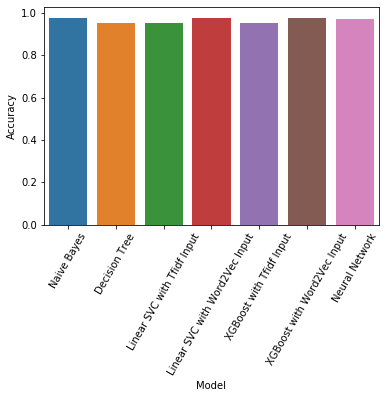

In [74]:
# Stored the model names and their accuracy in a dataframe
# Plotted a barplot for accuracy

classification_models = ['Naive Bayes', 'Decision Tree', 'Linear SVC with Tfidf Input', 'Linear SVC with Word2Vec Input', 'XGBoost with Tfidf Input', 'XGBoost with Word2Vec Input', 'Neural Network']
model_accuracy = []
for accuracy in (nb_accuracy, dt_accuracy_tfidf, svm_accuracy_tfidf, svm_accuracy_word2vec, xgb_accuracy_tfidf, xgb_accuracy_word2vec, nn_accuracy):
    model_accuracy.append(accuracy)

models_accuracy_df = pd.DataFrame({'Model': classification_models, 'Accuracy': model_accuracy})
bar = sb.barplot(x = 'Model', y = 'Accuracy', data = models_accuracy_df)
plt.xticks(rotation = 60)

In [75]:
# Created confusion matrices for the 3 models
nb_confusion_matrix = confusion_matrix(Y_test, Ypredict_nb)
dt_confusion_matrix = confusion_matrix(Y_test, Ypredict_tfidf_dt)
svm_tfidf_confusion_matrix = confusion_matrix(Y_test, Ypredict_tfidf_svm)
svm_word2vec_confusion_matrix = confusion_matrix(Y_test, Ypredict_word2vec_svm)
xgb_tfidf_confusion_matrix = confusion_matrix(Y_test, Ypredict_tfidf_xgb)
xgb_word2vec_confusion_matrix = confusion_matrix(Y_test, Ypredict_word2vec_xgb)

# Confusion matrix needs both labels & predictions as single-digits 
# Not as one-hot encoded vectors
# Converted them too to single-digit ones for the neural network
y_test_nn_1d = []
y_pred_nn_1d = []

# Iterated over a for loop to populate the single digit list of y_test and y_predict
for i in range(len(Ytest_nn)):
    prob_test = Ytest_nn[i]
    prob_predict = Y_predict_nn[i]
    index_array_test = np.nonzero(prob_test)
    test_index = index_array_test[0].item(0)
    y_test_nn_1d.append(test_index)
    predicted_index = np.argmax(prob_predict)
    y_pred_nn_1d.append(predicted_index)
    
nn_confusion_matrix = confusion_matrix(y_test_nn_1d, y_pred_nn_1d)

In [76]:
# Created dictionaries to store topics and topic ids

# Created a function to plot the confusion matrices of the 3 models
def plotConfusionMatrix(model_confusion_matrix, model_name, i):
    plt.subplot(i)
    sb.heatmap(model_confusion_matrix, annot = True, fmt = 'd', cmap = 'BuPu')
    plt.title('Confusion Matrix of the %s'%model_name)

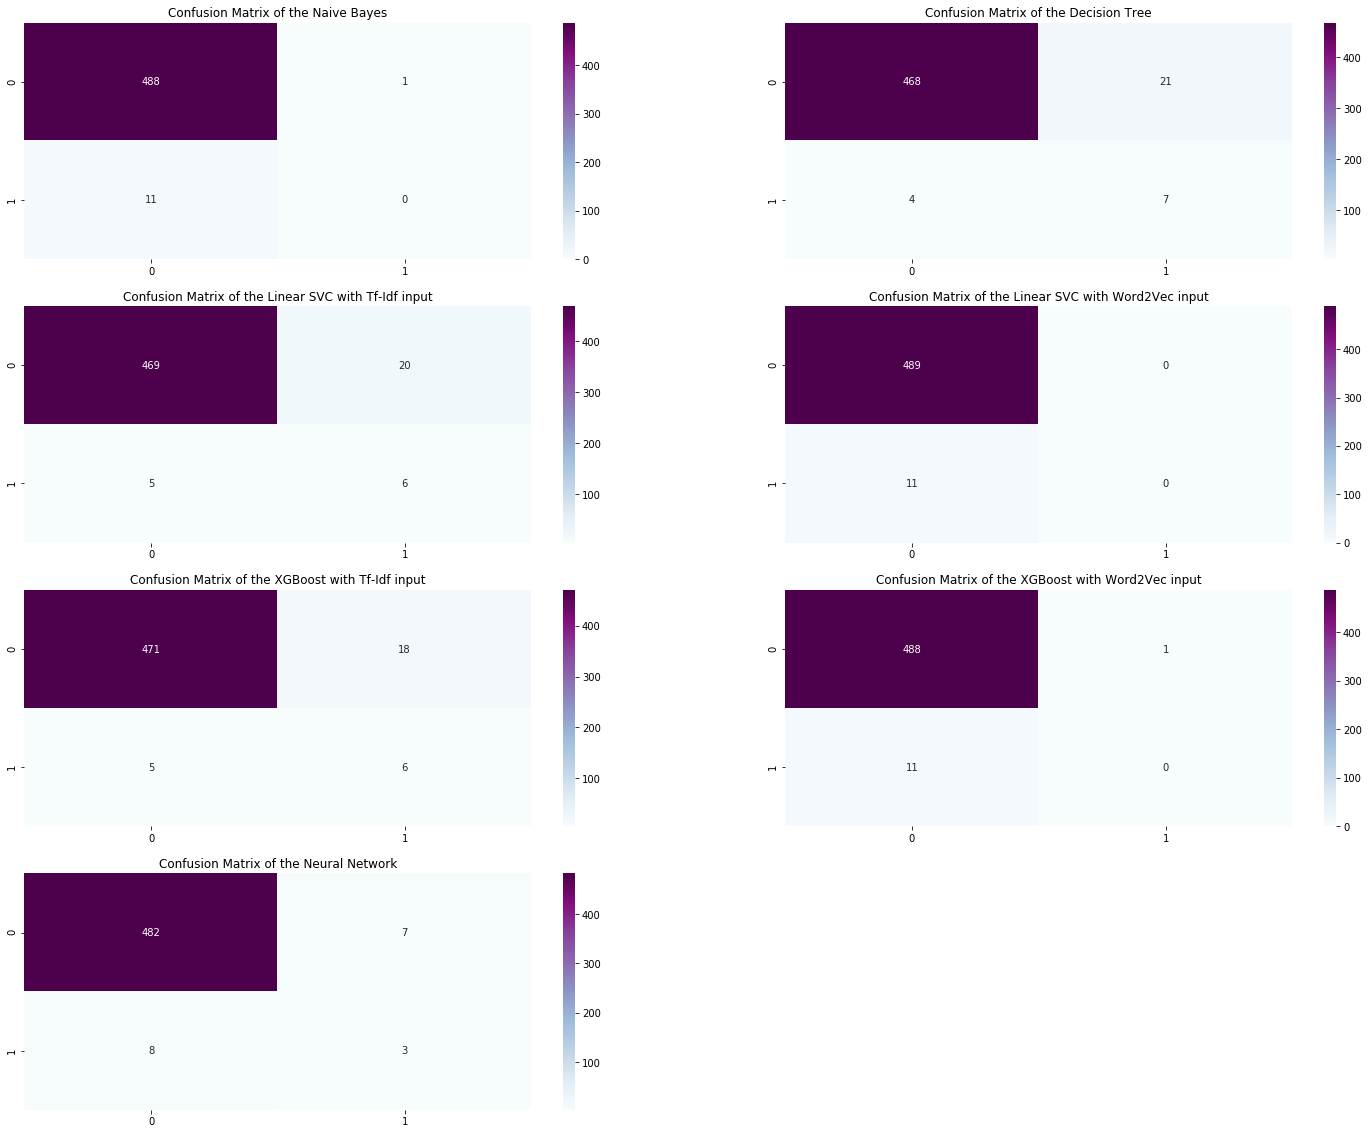

<Figure size 432x288 with 0 Axes>

In [86]:
# Plotted the heatmap of the 3 confusion matrices
plt.figure(figsize=(25, 20))
plotConfusionMatrix(nb_confusion_matrix, 'Naive Bayes', 421)
plotConfusionMatrix(dt_confusion_matrix, 'Decision Tree', 422)
plotConfusionMatrix(svm_tfidf_confusion_matrix, 'Linear SVC with Tf-Idf input', 423)
plotConfusionMatrix(svm_word2vec_confusion_matrix, 'Linear SVC with Word2Vec input', 424)
plotConfusionMatrix(xgb_tfidf_confusion_matrix, 'XGBoost with Tf-Idf input', 425)
plotConfusionMatrix(xgb_word2vec_confusion_matrix, 'XGBoost with Word2Vec input', 426)
plotConfusionMatrix(nn_confusion_matrix, 'Neural Network', 427)

plt.show()
plt.savefig('ConfusionMatrix.png')

In [78]:
print('Classification Report of Naive Bayes:')
print(classification_report(Y_test, Ypredict_nb))
print('*********************************************************************')
print('Classification Report of Decision Tree:')
print(classification_report(Y_test, Ypredict_tfidf_dt))
print('*********************************************************************')
print('Classification Report of Linear SVC with Tf-Idf input:')
print(classification_report(Y_test, Ypredict_tfidf_svm))
print('*********************************************************************')
print('Classification Report of Linear SVC with Word2Vec input:')
print(classification_report(Y_test, Ypredict_word2vec_svm))
print('*********************************************************************')
print('Classification Report of XGBoost with Tf-Idf input:')
print(classification_report(Y_test, Ypredict_tfidf_xgb))
print('*********************************************************************')
print('Classification Report of XGBoost with Word2Vec input:')
print(classification_report(Y_test, Ypredict_word2vec_xgb))
print('*********************************************************************')
print('Classification Report of Neural Network:')
print(classification_report(y_test_nn_1d, y_pred_nn_1d))

Classification Report of Naive Bayes:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       489
           1       0.00      0.00      0.00        11

    accuracy                           0.98       500
   macro avg       0.49      0.50      0.49       500
weighted avg       0.96      0.98      0.97       500

*********************************************************************
Classification Report of Decision Tree:
              precision    recall  f1-score   support

           0       0.99      0.96      0.97       489
           1       0.25      0.64      0.36        11

    accuracy                           0.95       500
   macro avg       0.62      0.80      0.67       500
weighted avg       0.98      0.95      0.96       500

*********************************************************************
Classification Report of Linear SVC with Tf-Idf input:
              precision    recall  f1-score   support

           0      

C:\Users\sriva\anaconda3.1\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [79]:
def predictTopic(text, model, isNeural):
    text = [text]
    #print(text)
    if isNeural == False:
        text_features = tfidf_vector.transform(text)
        prediction = model.predict(text_features)[0]
    else:
        text_features = text_tokenizer.texts_to_matrix(text)
        prediction = model.predict(text_features)
        prediction = np.argmax(prediction)
    return prediction


question = ["Do you know how much cholesterol is in the whey fuel (034574) has?"]

In [80]:
'''print('Prediction by Naive Bayes Classifier: ', predictTopic(test_dataset.loc[3, 'cleaned_tweet_text'], nb_model, isNeural = False))
print('Prediction by Decision Tree Classifier: ', predictTopic(test_dataset.loc[3, 'cleaned_tweet_text'], dt_model, isNeural = False))
print('Prediction by Linear SVC Classifier: ', predictTopic(test_dataset.loc[3, 'cleaned_tweet_text'], svm_model, isNeural = False))
print('Prediction by XGBoost Classifier: ', predictTopic(test_dataset.loc[3, 'cleaned_tweet_text'], svm_model, isNeural = False))
print('Prediction by Neural Network Classifier: ', predictTopic(test_dataset.loc[3, 'cleaned_tweet_text'], neural_net_model, isNeural = True))'''

"print('Prediction by Naive Bayes Classifier: ', predictTopic(test_dataset.loc[3, 'cleaned_tweet_text'], nb_model, isNeural = False))\nprint('Prediction by Decision Tree Classifier: ', predictTopic(test_dataset.loc[3, 'cleaned_tweet_text'], dt_model, isNeural = False))\nprint('Prediction by Linear SVC Classifier: ', predictTopic(test_dataset.loc[3, 'cleaned_tweet_text'], svm_model, isNeural = False))\nprint('Prediction by XGBoost Classifier: ', predictTopic(test_dataset.loc[3, 'cleaned_tweet_text'], svm_model, isNeural = False))\nprint('Prediction by Neural Network Classifier: ', predictTopic(test_dataset.loc[3, 'cleaned_tweet_text'], neural_net_model, isNeural = True))"

In [81]:
target_streaming_data['cleaned_tweet_text'] = target_streaming_data['text'].apply(lambda x : cleanTweetText(x))
target_streaming_data['churn_likeliness'] = target_streaming_data['cleaned_tweet_text'].apply(lambda x : predictTopic(x, dt_model, isNeural = False))

In [82]:
target_streaming_data.head()

,screen_name,date_time,location,text,cleaned_tweet_text,is_retweet,sentiment,classifier_text,streaming_platform,churn_likeliness
0,mattshoodie,2020-04-11 23:57:51,Hell’s Kitchen NYC,@MarvelAAge @disneyplus Bring it to @hulu I do...,marvelaage disneyplus bring hulu want pg devil...,False,Neutral,@disneyplus bring it to @hulu i do not want a ...,"hulu, disneyplus",0
1,sunkissed221,2020-04-11 23:49:12,"Rock Island, IL",@ryanvanasse @disneyplus @netflix Exactly! Jus...,ryanvanasse disneyplus netflix exactly commerc...,False,Positive,@disneyplus @netflix exactly just no commercials,"netflix, disneyplus",1
2,RickyM27B,2020-04-11 23:18:24,NaN,@susanahh_ @disneyplus Netflix does!,susanahh disneyplus netflix,False,Neutral,@disneyplus netflix does,"netflix, disneyplus",0
3,motorfckinghead,2020-04-11 23:18:15,Hemingway's hill,@RealDealKB @disneyplus On Netflix. But coming...,realdealkb disneyplus netflix coming soon disn...,False,Neutral,@disneyplus on netflix but coming soon to disn...,"netflix, disneyplus",0
4,SirWilliam118,2020-04-11 23:08:47,"San Antonio, TX",Really wish Wolf of Wall Street was on #Netfli...,really wish wolf wall street netflix date pres...,True,Positive,really wish wolf of wall street was on and my ...,"netflix, disneyplus",0


In [83]:
target_streaming_data.to_pickle('final_target_data.pkl')
#streaming_platforms_data.to_pickle('streaming_final_data.pkl')

In [84]:
target_streaming_data.shape

(27404, 10)